<a href="https://colab.research.google.com/github/AnishaVardh/RFM-Analysis/blob/main/RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CUSTOMER SEGMENTATION USING RFM**
R-Recency
F-Frequency
M-Monetary

In [ ]:
library(data.table)
library(dplyr)
library(ggplot2)
#library(stringr)
#library(DT)
library(tidyr)
library(knitr)
library(rmarkdown)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Read Data

In [ ]:
df_data <- fread('data.csv')
glimpse(df_data)

Rows: 541,909
Columns: 8
$ InvoiceNo   <chr> "536365", "536365", "536365", "536365", "536365", "536365"…
$ StockCode   <chr> "85123A", "71053", "84406B", "84029G", "84029E", "22752", …
$ Description <chr> "WHITE HANGING HEART T-LIGHT HOLDER", "WHITE METAL LANTERN…
$ Quantity    <int> 6, 6, 8, 6, 6, 2, 6, 6, 6, 32, 6, 6, 8, 6, 6, 3, 2, 3, 3, …
$ InvoiceDate <chr> "12/1/2010 8:26", "12/1/2010 8:26", "12/1/2010 8:26", "12/…
$ UnitPrice   <dbl> 2.55, 3.39, 2.75, 3.39, 3.39, 7.65, 4.25, 1.85, 1.85, 1.69…
$ CustomerID  <int> 17850, 17850, 17850, 17850, 17850, 17850, 17850, 17850, 17…
$ Country     <chr> "United Kingdom", "United Kingdom", "United Kingdom", "Uni…


Data Cleaning

In [ ]:
df_data <- df_data %>% 
  mutate(Quantity = replace(Quantity, Quantity<=0, NA),
         UnitPrice = replace(UnitPrice, UnitPrice<=0, NA))

df_data <- df_data %>%
  drop_na()

Recode variables

In [ ]:
df_data <- df_data %>% 
  mutate(InvoiceNo=as.factor(InvoiceNo), StockCode=as.factor(StockCode), 
         InvoiceDate=as.Date(InvoiceDate, '%m/%d/%Y %H:%M'), CustomerID=as.factor(CustomerID), 
         Country=as.factor(Country))

df_data <- df_data %>% 
  mutate(total_dolar = Quantity*UnitPrice)

glimpse(df_data)

Rows: 397,884
Columns: 9
$ InvoiceNo   <fct> 536365, 536365, 536365, 536365, 536365, 536365, 536365, 53…
$ StockCode   <fct> 85123A, 71053, 84406B, 84029G, 84029E, 22752, 21730, 22633…
$ Description <chr> "WHITE HANGING HEART T-LIGHT HOLDER", "WHITE METAL LANTERN…
$ Quantity    <int> 6, 6, 8, 6, 6, 2, 6, 6, 6, 32, 6, 6, 8, 6, 6, 3, 2, 3, 3, …
$ InvoiceDate <date> 2010-12-01, 2010-12-01, 2010-12-01, 2010-12-01, 2010-12-0…
$ UnitPrice   <dbl> 2.55, 3.39, 2.75, 3.39, 3.39, 7.65, 4.25, 1.85, 1.85, 1.69…
$ CustomerID  <fct> 17850, 17850, 17850, 17850, 17850, 17850, 17850, 17850, 17…
$ Country     <fct> United Kingdom, United Kingdom, United Kingdom, United Kin…
$ total_dolar <dbl> 15.30, 20.34, 22.00, 20.34, 20.34, 15.30, 25.50, 11.10, 11…


Calculate RFM

---
Find the most recent date for each ID and calculate the days to the now or some other date, to get the Recency data.

Calculate the quantity of translations of a customer, to get the Frequency data
Sum the amount of money a customer spent and divide it by Frequency, to get the amount per transaction on average, that is the Monetary data.



In [ ]:
df_RFM <- df_data %>% 
  group_by(CustomerID) %>% 
  summarise(recency=as.numeric(as.Date("2012-01-01")-max(InvoiceDate)),
            frequenci=n_distinct(InvoiceNo), monitery= sum(total_dolar)/n_distinct(InvoiceNo)) 

summary(df_RFM)

kable(head(df_RFM))

   CustomerID      recency        frequenci          monitery       
 12346  :   1   Min.   : 23.0   Min.   :  1.000   Min.   :    3.45  
 12347  :   1   1st Qu.: 40.0   1st Qu.:  1.000   1st Qu.:  178.62  
 12348  :   1   Median : 73.0   Median :  2.000   Median :  293.90  
 12349  :   1   Mean   :115.1   Mean   :  4.272   Mean   :  419.17  
 12350  :   1   3rd Qu.:164.8   3rd Qu.:  5.000   3rd Qu.:  430.11  
 12352  :   1   Max.   :396.0   Max.   :209.000   Max.   :84236.25  
 (Other):4332                                                       



|CustomerID | recency| frequenci|   monitery|
|:----------|-------:|---------:|----------:|
|12346      |     348|         1| 77183.6000|
|12347      |      25|         7|   615.7143|
|12348      |      98|         4|   449.3100|
|12349      |      41|         1|  1757.5500|
|12350      |     333|         1|   334.4000|
|12352      |      59|         8|   313.2550|

Clustering

In [ ]:
df_RFM2 <- df_RFM
row.names(df_RFM2) <- df_RFM2$CustomerID

Warning message:
“Setting row names on a tibble is deprecated.”


In [ ]:
df_RFM2$CustomerID <- NULL

df_RFM2 <- scale(df_RFM2)
summary(df_RFM2)

    recency          frequenci           monitery       
 Min.   :-0.9205   Min.   :-0.42505   Min.   :-0.23140  
 1st Qu.:-0.7505   1st Qu.:-0.42505   1st Qu.:-0.13389  
 Median :-0.4205   Median :-0.29514   Median :-0.06973  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.4968   3rd Qu.: 0.09457   3rd Qu.: 0.00609  
 Max.   : 2.8091   Max.   :26.59496   Max.   :46.65478  

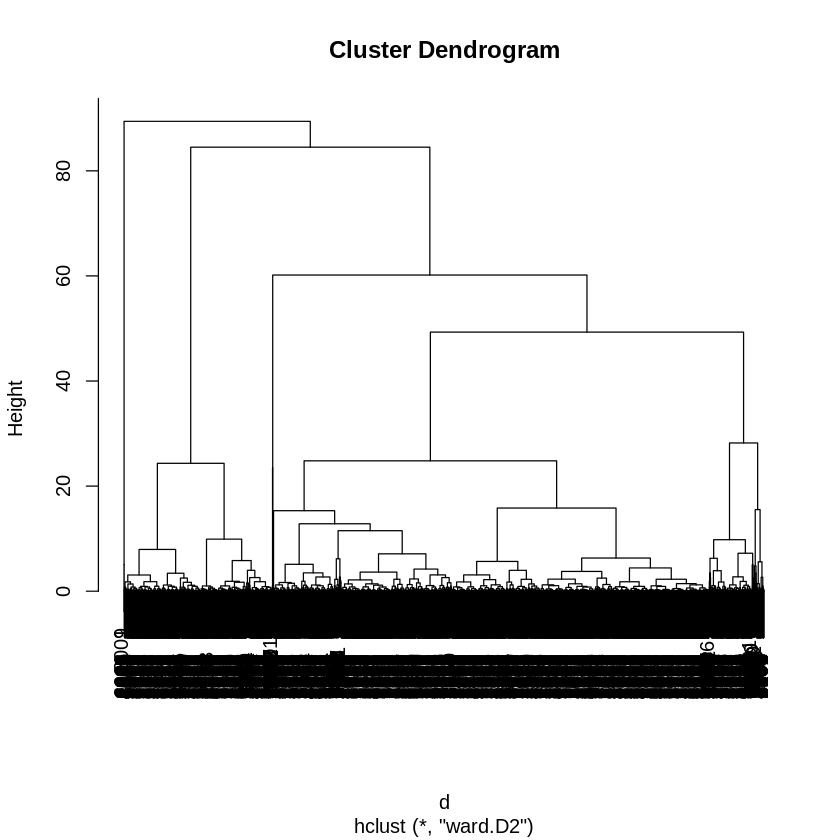

In [ ]:
d <- dist(df_RFM2)
c <- hclust(d, method = 'ward.D2')

plot(c)

In [ ]:
members <- cutree(c,k = 8)

members[1:5]

[1] 1 2 3 3 4

In [ ]:
table(members)

members
   1    2    3    4    5    6    7    8 
   2 1744 1208  488  516  306   67    7 

In [ ]:
df2<-aggregate(df_RFM[,2:4], by=list(members), mean)

Group.1,recency,frequenci,monitery
<int>,<dbl>,<dbl>,<dbl>
1,185.50000,1.500000,80709.9250
2,44.24312,3.702408,319.1206
3,107.22185,2.511589,504.6539
4,332.09016,1.290984,313.9860
5,223.57364,1.711240,276.0749
6,41.18301,14.045752,482.9951
7,28.02985,34.716418,664.7225
8,24.14286,128.714286,391.7894
